# Your First Algorithm of Machine Learning (ML) - Logistic Regression Proyect

## Table of content

## Explore Data Analysis (EDA)

### 0. Import libraries

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 1. Data Collection

In [130]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'

def get_data(URL:str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=';')
    total_data.head()
    return total_data

get_data(URL)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 2. Exploration and Data Cleaning

In [131]:
total_data = get_data(URL)

#### 2.1 Drop Duplicate Information

In this case, we don't delete any row beacause there is no duplicated data

In [132]:
total_data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### 2.2 Drop Irrelevant Information

In [ ]:
total_data = get_data(URL)

def clean_data(df:pd.DataFrame) -> pd.DataFrame:
    df_ = df.copy()
    df_.drop(["contact", "day_of_week", "month", "duration", "nr.employed", "previous", "pdays"], axis = 1, inplace = True)
    return df_

cleaned_data = clean_data(total_data)
cleaned_data.head(5)

,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,93.994,-36.4,4.857,no


## 3. Univariate Analysis

#### 3.1 Dividing our dataset into categorical and numerical

In [134]:
numerical_variables = cleaned_data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Variables:", numerical_variables)

categorical_variables = cleaned_data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Variables:", categorical_variables)

print(cleaned_data.dtypes)

Numerical Variables: ['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
Categorical Variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
campaign            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
y                  object
dtype: object


#### 3.2 Categorical Variable Analysis

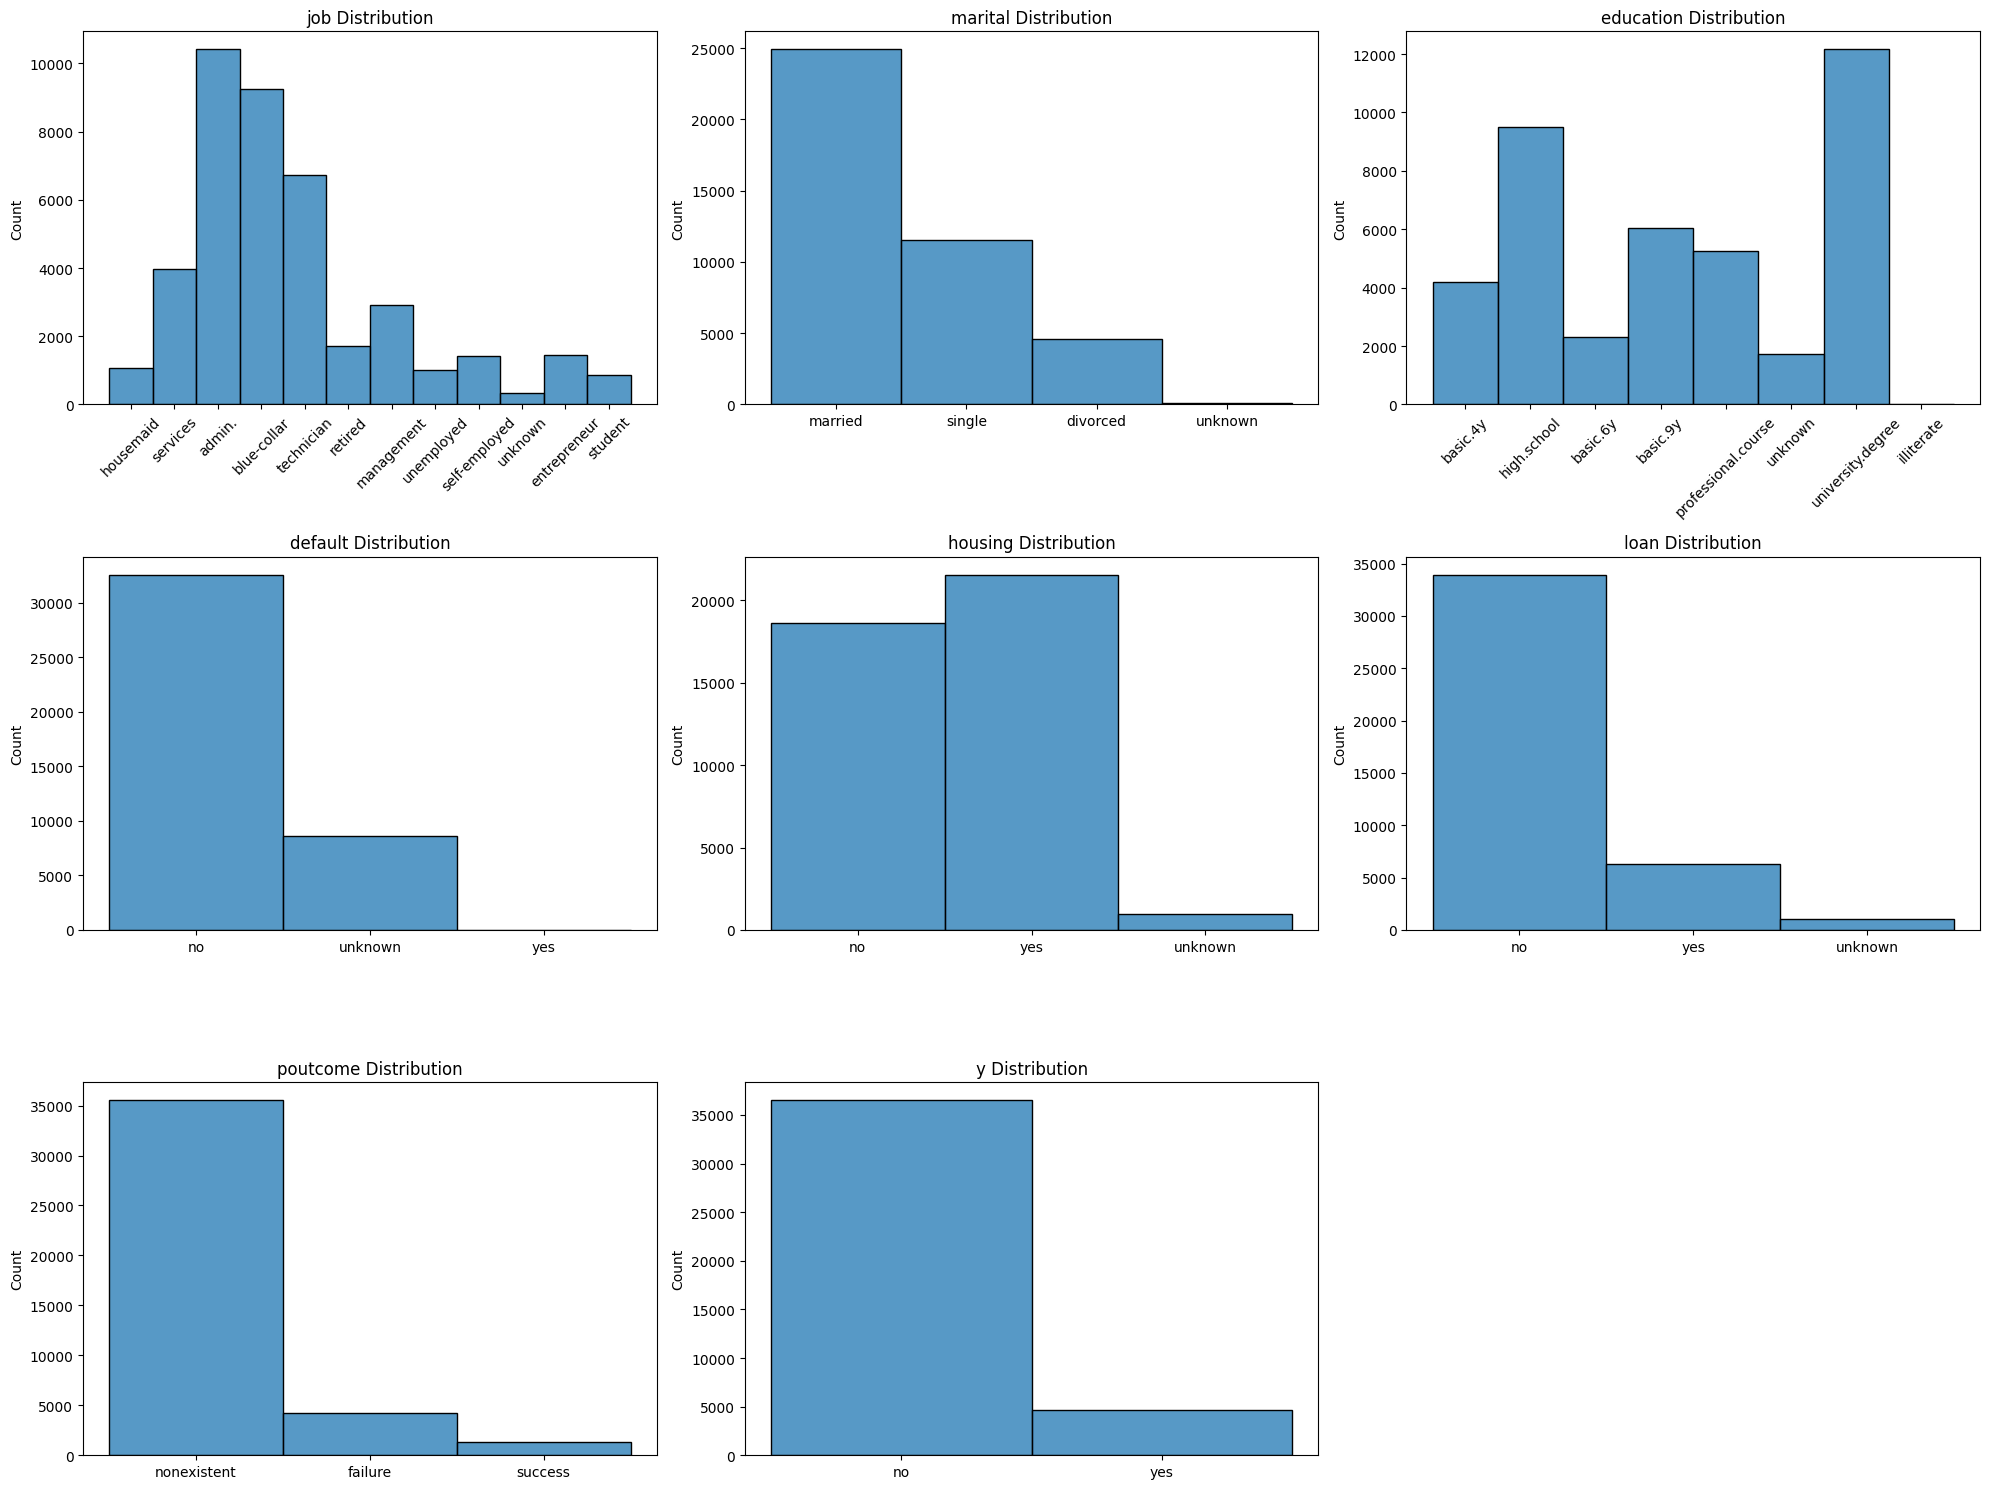

In [135]:
fig, axis = plt.subplots(3, 3, figsize=(20, 15))

def histplot(columns: list[str], cleaned_data: pd.DataFrame, axis_array):
    for i, column in enumerate(columns):
        row = i // axis_array.shape[1]
        col = i % axis_array.shape[1]

        sns.histplot(data=cleaned_data, x=column, ax=axis_array[row, col], palette='viridis')
        axis_array[row, col].set_title(f'{column} Distribution')
        axis_array[row, col].set_xlabel('')

        if cleaned_data[column].nunique() > 5:
            axis_array[row, col].tick_params(axis='x', rotation=45)

    for j in range(len(columns), axis_array.size):
        row = j // axis_array.shape[1]
        col = j % axis_array.shape[1]
        fig.delaxes(axis_array[row, col])

    plt.tight_layout()
    plt.show()

histplot(categorical_variables, cleaned_data, axis)

#### 3.3 Numerical Variable Analysis